# this demo is to setup using python2

In [1]:
#from IPython.display import Image
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from IPython.core.display import HTML 
import json
from pprint import pprint
import os
import time
import hashlib

In [2]:
def get_md5(txt):
    #return md5.new(txt).digest()
    return str(hashlib.sha224(txt).hexdigest())

In [3]:
def image_preview(image_path, box, cate):
    #img1 = Image(filename = image_path, width=100, height=100)
    img1 = Image.open(image_path)
    if box is not None and box != '':
        draw = ImageDraw.Draw(img1)
        bb = box.split(",")
        x0 = float(bb[0])
        y0 = float(bb[2])
        x1 = float(bb[1])
        x2 = float(bb[3])
        draw.rectangle([(x0, y0), (x1, x2)], outline='red')
        if cate is not None and cate != "":
            draw.text((x0, y0), cate, fill="red")
    img = img1
    return img

In [4]:
from aliyunsdkcore import client
from aliyunsdkcore.profile import region_provider

import ali_config

product = "ImageSearch"
region = ali_config.region # via: cn-shanghai(sh), ap-southeast-1(sg)
accessKeyId = ali_config.accessKeyId # via: https://ak-console.aliyun.com
accessKeySecret = ali_config.accessKeySecret
domain = "imagesearch."+ region +".aliyuncs.com"

instanceNameCategory = "testforbc";
instanceNameSimilarity = "general1" #"general1";

region_provider.add_endpoint(product, region, domain)
requestClient = client.AcsClient(accessKeyId, accessKeySecret, region)

In [5]:
from aliyunsdkimagesearch.request.v20180120.SearchItemRequest import SearchItemRequest

def image_search_category(instanceName, image_path):
    request = SearchItemRequest()

    request.set_instance_name(instanceName)
    request.set_num(20)
    request.set_start(0)

    file_object = open(image_path)
    file_content = None
    try:
        file_content = file_object.read()
    finally:
        file_object.close()

    request.set_search_picture(file_content)

    request.build_post_content()

    result = requestClient.do_action(request)
    return result

In [6]:
def image_search_result_category(instanceName, image_path):
    result = image_search_category(instanceName, image_path)
    r = json.loads(result)
    category_desc = ''
    for c in r['PicInfo']['AllCategory']['Category']:
        if r['PicInfo']['Category'] == c['Id']:
            category_desc = c['Name']
    r['cate_desc'] = category_desc
    r['cate_id'] = r['PicInfo']['Category']
    #pprint(r)
    display(image_preview(image_path, r['PicInfo']['Region'], category_desc))
    print(image_path, 'found category_desc: ', category_desc, r['PicInfo']['Category'], 'found category_id: ', r['PicInfo']['Category'], 'found region: ',  r['PicInfo']['Region'])
    return r



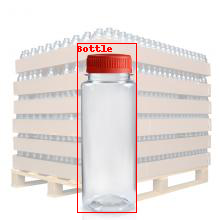

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'77,136,43,212')


In [7]:
# test to search a single image

#instanceName = "testforbc"; # e.g. imagesearchtest
image_name = '5.jpg'
image_folder = '../images_bottle'
image_path = os.path.abspath(image_folder+'/'+image_name)
r = image_search_result_category(instanceNameCategory, image_path)
#cate_id = r['PicInfo']['Category']
#pprint(r)

In [8]:
from aliyunsdkimagesearch.request.v20180120.AddItemRequest import AddItemRequest

def image_upload_similarity(instanceName, image_name, image_path, cate_id, cate_desc):
    # load file
    file_object = open(image_path)
    file_content = None
    try:
        file_content = file_object.read()
    finally:
        file_object.close()
        
    img_id = get_md5(file_content)
    print('img_id: ', img_id)

    request = AddItemRequest()
    request.set_instance_name(instanceName)
    request.set_cate_id(str(cate_id))
    request.set_item_id(img_id)
    image_content = {'name': image_name, 'path': image_path, 'img_id': img_id, 'cate_id': cate_id, 'cate_desc': cate_desc}
    #pprint(image_content)
    request.set_cust_content(json.dumps(image_content))

    print len(file_content)
    request.add_picture(image_name, file_content)
    request.build_post_content()

    result = requestClient.do_action(request)
    return result



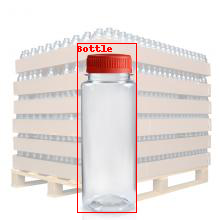

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'77,136,43,212')
(u'8', u'Bottle')
('img_id: ', 'da1908d43ed162a76c1598d22a1465a9fb43f50a1aea8d2cca49ccc7')
5923
('/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', '{"Message":"success","RequestId":"DC50362A-2A54-4533-BB52-E0BC1534FFE3","Success":true,"Code":0}')


In [9]:
# test to upload a single image

#instanceName = "testforbcgeneral"; # e.g. imagesearchtest
image_name = '5.jpg'
image_folder = '../images_bottle'
image_path = os.path.abspath(image_folder+'/'+image_name)
r = image_search_result_category(instanceNameCategory, image_path)
#pprint(r)
print(r['cate_id'], r['cate_desc'])
result = image_upload_similarity(instanceNameSimilarity, image_name, image_path, r['cate_id'], r['cate_desc'])
print(image_path, result)

{'/Users/jianhuashao/code/demo_imagesearch/images_bottle/003-220x220.jpg': '003-220x220.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/008-220x220.jpg': '008-220x220.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/1.jpg': '1.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/2.jpg': '2.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/3.jpg': '3.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/4.jpg': '4.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg': '5.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/6.jpg': '6.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/7.jpg': '7.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/8.jpg': '8.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg': '9.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg': 'IMG_20160507_111836-220x220.jpg',
 '/Users/jianhuashao

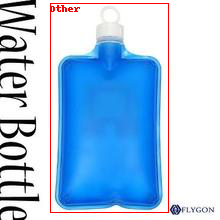

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/7.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'50,168,3,212')
('img_id: ', '18e44724ef73f46298bb190539898904029d97deb2c6234fa24e4260')
7349
('general1', '7.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/7.jpg', '{"Message":"success","RequestId":"E1905575-9E31-4991-90C0-3F36CE08EAEC","Success":true,"Code":0}')


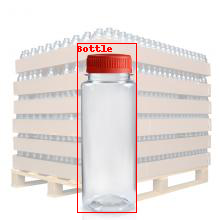

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'77,136,43,212')
('img_id: ', 'da1908d43ed162a76c1598d22a1465a9fb43f50a1aea8d2cca49ccc7')
5923
('general1', '5.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', '{"Message":"success","RequestId":"CE4693B3-F390-4158-8E00-3F666236CCCF","Success":true,"Code":0}')


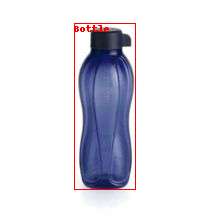

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/3.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'74,135,23,189')
('img_id: ', '8872e6abf4746903685f0861f41b22d8e57523abbd467da277cea65a')
3226
('general1', '3.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/3.jpg', '{"Message":"success","RequestId":"E6CED1A8-7469-4791-B81F-3DA9B8197F62","Success":true,"Code":0}')


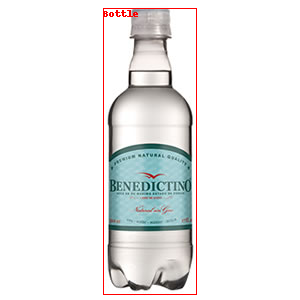

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/4.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'103,196,8,294')
('img_id: ', 'bdfa1c7a4f4bb1e84497e038518643db563c98916cfa02e420407d8f')
7898
('general1', '4.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/4.jpg', '{"Message":"success","RequestId":"C4B01A63-69A1-4C88-835D-12B9B65DA79F","Success":true,"Code":0}')


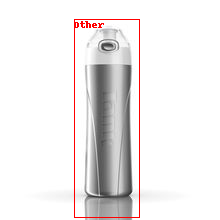

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/1.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'74,139,19,217')
('img_id: ', '5c47a64b53c64d8155a4389ec36ed7b0126754cf36d8fe33f0f94abc')
2965
('general1', '1.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/1.jpg', '{"Message":"success","RequestId":"AE9B0B6D-7638-4F2A-B158-658C56E53138","Success":true,"Code":0}')


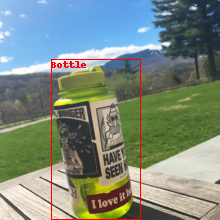

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/WaterBottle11-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'51,140,59,219')
('img_id: ', '9a0199e9fee78a7f1efe5b4bcf8d4b19097300e6b5b6949efbb705a8')
11936
('general1', 'WaterBottle11-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/WaterBottle11-220x220.jpg', '{"Message":"success","RequestId":"8595F986-BFE2-4E85-9633-632BD395A6E8","Success":true,"Code":0}')


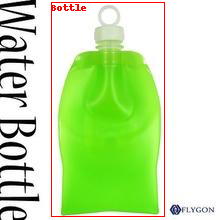

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/6.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'51,164,2,216')
('img_id: ', 'f9f26adb1f6bfc02e9376249850b9f924eaadcb0ae1ade83503cd5e9')
6802
('general1', '6.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/6.jpg', '{"Message":"success","RequestId":"F7FC8BD8-D7F4-4336-832E-F1D0BE60E97E","Success":true,"Code":0}')


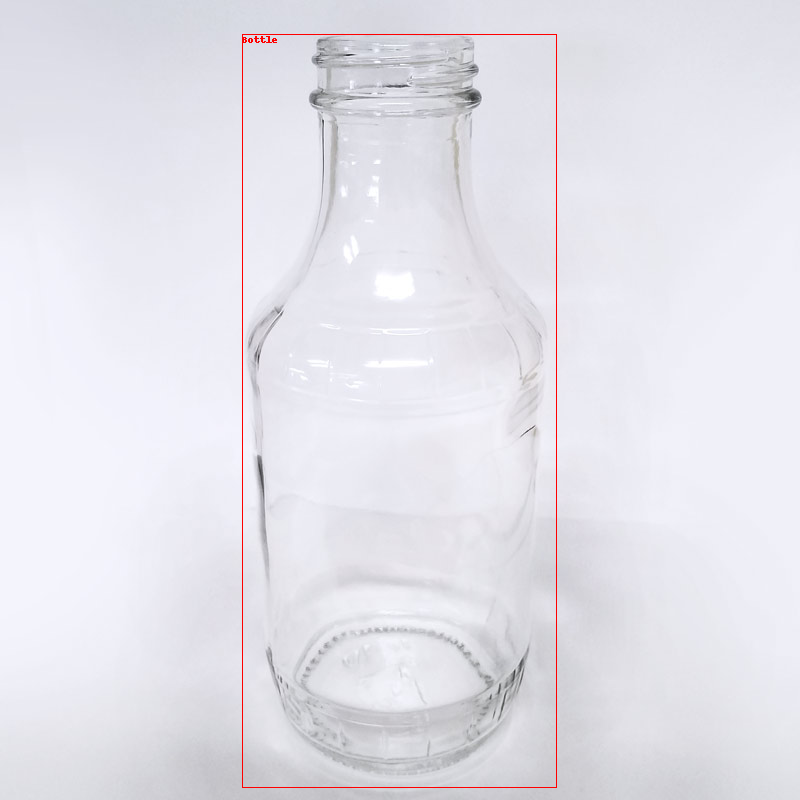

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/bottle-sm-decanter.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'242,556,34,787')
('img_id: ', 'f728643c806d3f47d0d882ec294e1981b2240d9df3f418957cc5cafc')
35389
('general1', 'bottle-sm-decanter.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/bottle-sm-decanter.jpg', '{"Message":"success","RequestId":"F8AAF124-DF6A-4429-B616-1938D1679D8A","Success":true,"Code":0}')


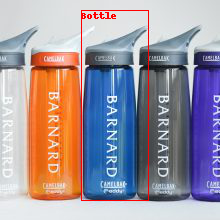

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/003-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'81,148,10,200')
('img_id: ', 'f8509dec903cf12693b9a5f6086c99f50d4926ed7831651524461069')
12024
('general1', '003-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/003-220x220.jpg', '{"Message":"success","RequestId":"3D53BB5C-74FA-42E8-A37B-D352D01E2A56","Success":true,"Code":0}')


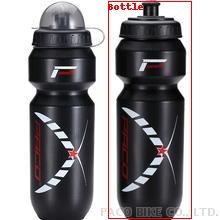

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'108,191,1,218')
('img_id: ', '7608e199a1ea31120b54b8547337533115347ffa690a3ed9dfa68c95')
8574
('general1', '9.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg', '{"Message":"success","RequestId":"8883EA21-88DB-4743-9586-D9FFC5946E5F","Success":true,"Code":0}')


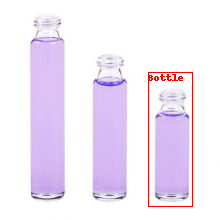

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/prodcat_glass-vials-roller-ball-bottles-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'148,192,72,206')
('img_id: ', 'ed4e1babe9d722643b435c1a3c99a9f9fd6e30002acc082944738b88')
4464
('general1', 'prodcat_glass-vials-roller-ball-bottles-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/prodcat_glass-vials-roller-ball-bottles-220x220.jpg', '{"Message":"success","RequestId":"A12EB9B4-6FE1-45E8-8F3F-513DD2BF3761","Success":true,"Code":0}')


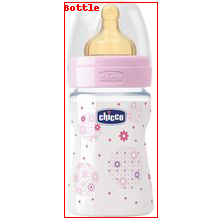

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/2.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'64,157,2,217')
('img_id: ', '9e14560e344a30c474f1bd665c9ed8886ea00ee0bc4d969f35fea407')
4660
('general1', '2.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/2.jpg', '{"Message":"success","RequestId":"3651069D-05A5-427C-8590-6F3359C7CF15","Success":true,"Code":0}')


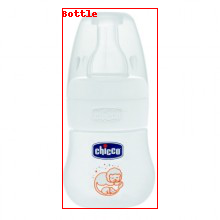

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/008-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'62,157,8,208')
('img_id: ', '098c65360d71a0d92fdb6d4eeb0ab4841c9556355e72493e073b915a')
4675
('general1', '008-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/008-220x220.jpg', '{"Message":"success","RequestId":"96BEF1C8-41CA-45C9-9780-52D2230936D0","Success":true,"Code":0}')


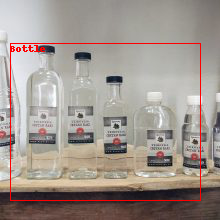

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'10,200,43,200')
('img_id: ', '340900c63f7aeced1513bbf9f6163b7c38641207a0aa71407cdc8004')
9927
('general1', 'IMG_20160507_111836-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg', '{"Message":"success","RequestId":"19C181F7-F11D-4AAD-A113-CAF9212CF8CE","Success":true,"Code":0}')


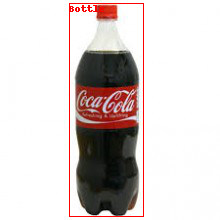

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/downloadcoca-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'69,143,3,216')
('img_id: ', 'b5f89255992781ee3535c78aac467d413d79e009664143cf7f130ea8')
6525
('general1', 'downloadcoca-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/downloadcoca-220x220.jpg', '{"Message":"success","RequestId":"24920497-B850-4CF8-A42A-B4199A98A484","Success":true,"Code":0}')


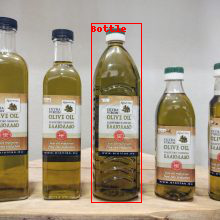

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_112417-220x220.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'91,141,23,202')
('img_id: ', '80c2ffc0427e0aa7bee12edbfc1d3622bf4f053fc067eaa1835e41d0')
12249
('general1', 'IMG_20160507_112417-220x220.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_112417-220x220.jpg', '{"Message":"success","RequestId":"BD946B45-0FDB-4C1F-9EA7-4F105D856B3D","Success":true,"Code":0}')


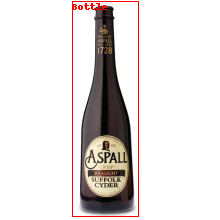

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/8.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'72,138,1,216')
('img_id: ', '21653c0b4316583c9785173ac5869edd69bb41ace7b729630305c78f')
5203
('general1', '8.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/8.jpg', '{"Message":"success","RequestId":"B36B751A-30F7-462A-BC8C-2D2AA9BEB1A6","Success":true,"Code":0}')


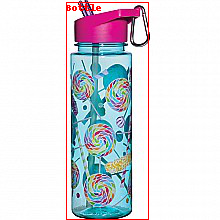

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/tgtgsu1724102.220x220.95b56.jpg', 'found category_desc: ', u'Bottle', u'8', 'found category_id: ', u'8', 'found region: ', u'66,148,2,219')
('img_id: ', 'ffe2778b039943c1856bcb747d982b9480e834f97473e24398afc243')
14344
('general1', 'tgtgsu1724102.220x220.95b56.jpg', '/Users/jianhuashao/code/demo_imagesearch/images_bottle/tgtgsu1724102.220x220.95b56.jpg', '{"Message":"success","RequestId":"C62DD266-4016-4D42-834A-78AFC7BE7285","Success":true,"Code":0}')


In [10]:
import os
import time
from pprint import pprint

image_folder = os.path.abspath('../images_bottle')
images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg"):
        image_path = os.path.join(image_folder, file)
        #print(os.path.abspath(image_path))
        images[image_path] = file

pprint(images)

for image_path in images:
    image_name = images[image_path]
    r = image_search_result_category(instanceNameCategory, image_path)
    result = image_upload_similarity(instanceNameSimilarity, image_name, image_path, r['cate_id'], r['cate_desc'])
    print(instanceNameSimilarity, image_name, image_path, result)
    time.sleep(1)

In [11]:
from aliyunsdkimagesearch.request.v20180120.SearchItemRequest import SearchItemRequest

def image_search_similarity(instanceName, image_path):
    request = SearchItemRequest()

    request.set_instance_name(instanceName)
    request.set_num(20)
    request.set_start(0)

    file_object = open(image_path)
    file_content = None
    try:
        file_content = file_object.read()
    finally:
        file_object.close()

    request.set_search_picture(file_content)

    request.build_post_content()

    result = requestClient.do_action(request)
    return result

In [12]:
def image_search_result_similarity(instanceName, image_path):
    result = image_search_similarity(instanceName, image_path)
    r = json.loads(result)
    #pprint(r)
    category_desc = ''
    for c in r['PicInfo']['AllCategory']['Category']:
        if r['PicInfo']['Category'] == c['Id']:
            category_desc = c['Name']
    #pprint(r)
    display(image_preview(image_path, r['PicInfo']['Region'], category_desc))
    
    print(image_path, 'found category_desc: ', category_desc, r['PicInfo']['Category'], 'found category_id: ', r['PicInfo']['Category'], 'found region: ',  r['PicInfo']['Region'])
    
    image_similar_name = json.loads(r['Auctions']['Auction'][1]['CustContent'])['name']
    image_similar_path = json.loads(r['Auctions']['Auction'][1]['CustContent'])['path']
    image_similar_score = r['Auctions']['Auction'][0]['SortExprValues']
    print("similar score: ", image_similar_score, "similar image: ", image_similar_path)
    
    #print(r['Auctions']['Auction'][1])
    display(image_preview(image_similar_path, '', ''))
    
    return r



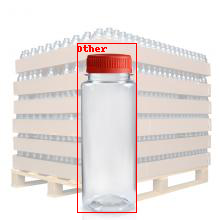

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'77,136,43,212')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/prodcat_glass-vials-roller-ball-bottles-220x220.jpg')


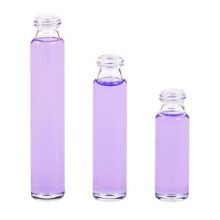

In [13]:
# test to search a single image

#instanceName = "testforbcgeneral"; # e.g. imagesearchtest
image_name = '5.jpg'
image_folder = '../images_bottle'
image_path = os.path.abspath(image_folder+'/'+image_name)
r = image_search_result_similarity(instanceNameSimilarity, image_path)
#pprint(r)

{'/Users/jianhuashao/code/demo_imagesearch/images_bottle/003-220x220.jpg': '003-220x220.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/008-220x220.jpg': '008-220x220.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/1.jpg': '1.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/2.jpg': '2.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/3.jpg': '3.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/4.jpg': '4.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg': '5.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/6.jpg': '6.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/7.jpg': '7.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/8.jpg': '8.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg': '9.jpg',
 '/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg': 'IMG_20160507_111836-220x220.jpg',
 '/Users/jianhuashao

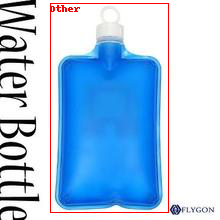

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/7.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'50,168,3,212')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/6.jpg')


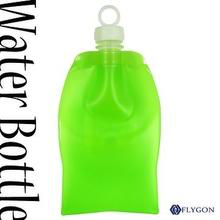

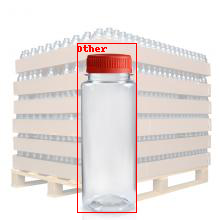

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'77,136,43,212')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/prodcat_glass-vials-roller-ball-bottles-220x220.jpg')


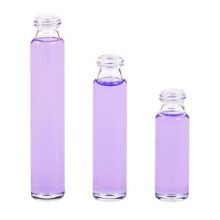

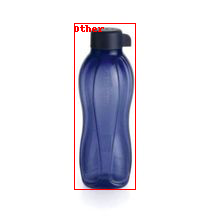

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/3.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'74,135,23,189')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg')


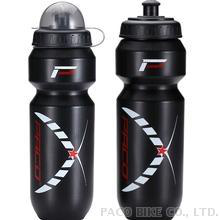

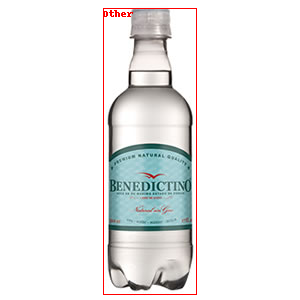

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/4.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'103,196,8,294')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_112417-220x220.jpg')


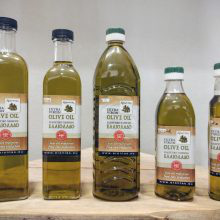

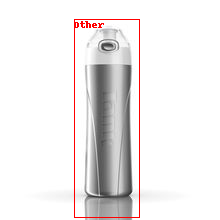

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/1.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'74,139,19,217')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/003-220x220.jpg')


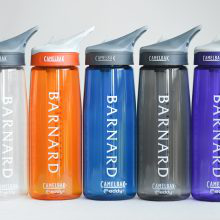

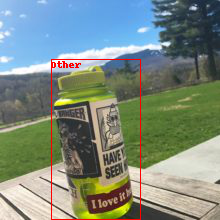

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/WaterBottle11-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'51,140,59,219')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg')


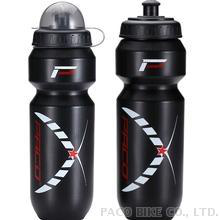

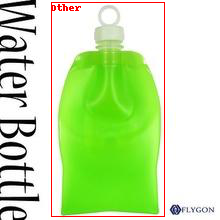

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/6.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'51,164,2,216')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/7.jpg')


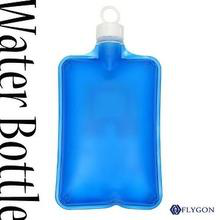

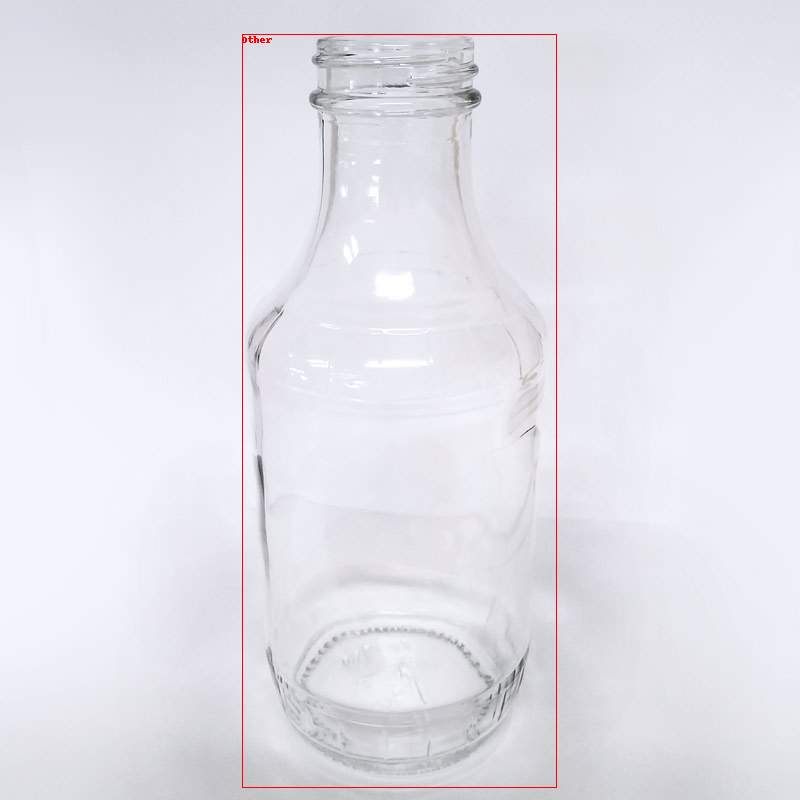

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/bottle-sm-decanter.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'242,556,34,787')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg')


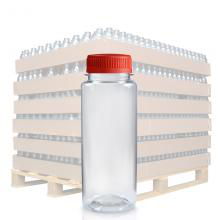

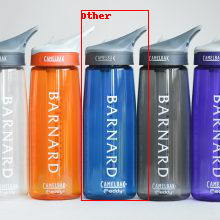

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/003-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'81,148,10,200')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg')


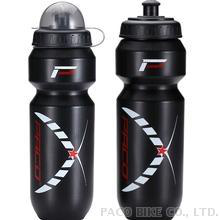

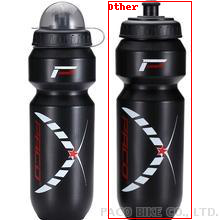

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/9.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'108,191,1,218')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/3.jpg')


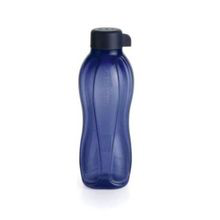

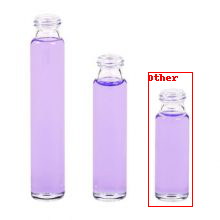

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/prodcat_glass-vials-roller-ball-bottles-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'148,192,72,206')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg')


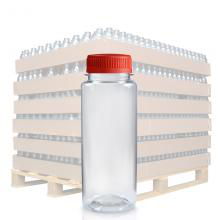

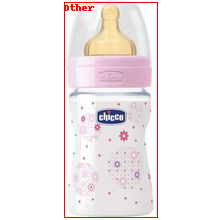

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/2.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'64,157,2,217')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/008-220x220.jpg')


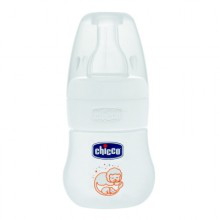

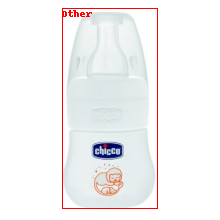

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/008-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'62,157,8,208')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/2.jpg')


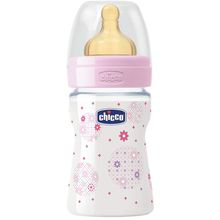

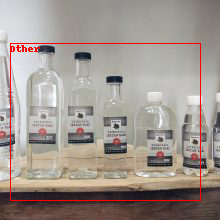

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'10,200,43,200')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_112417-220x220.jpg')


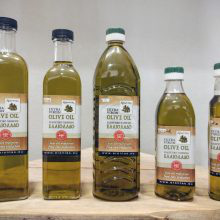

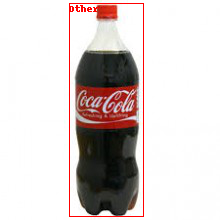

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/downloadcoca-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'69,143,3,216')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/4.jpg')


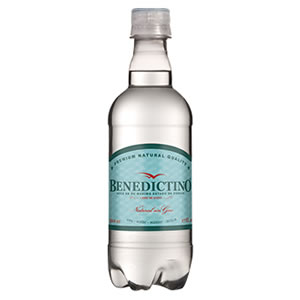

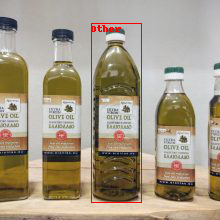

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_112417-220x220.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'91,141,23,202')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg')


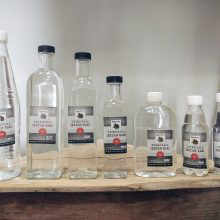

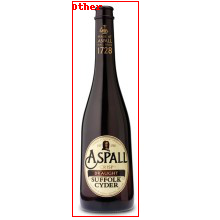

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/8.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'72,138,1,216')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/IMG_20160507_111836-220x220.jpg')


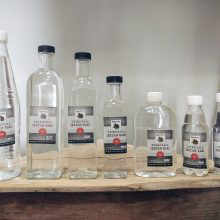

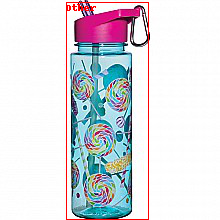

('/Users/jianhuashao/code/demo_imagesearch/images_bottle/tgtgsu1724102.220x220.95b56.jpg', 'found category_desc: ', u'Other', u'88888888', 'found category_id: ', u'88888888', 'found region: ', u'66,148,2,219')
('similar score: ', u'5.37633353624177e+24;0', 'similar image: ', u'/Users/jianhuashao/code/demo_imagesearch/images_bottle/5.jpg')


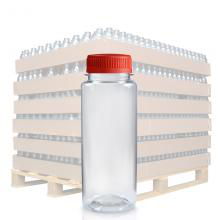

In [14]:
image_folder = os.path.abspath('../images_bottle')
images = {}
for file in os.listdir(image_folder):
    if file.endswith(".jpg"):
        image_path = os.path.join(image_folder, file)
        #print(os.path.abspath(image_path))
        images[image_path] = file

pprint(images)

for image_path in images:
    image_name = images[image_path]
    r = image_search_result_similarity(instanceNameSimilarity, image_path)
    print("\n=======\n")